y:Order Item Profit Ratio

Low profit ratios may suggest inefficiency or quality issues.

Regression Models:
Linear reg,
Decision Trees, Random Forest used for predicting continuous variables like profit ratios.

# Data exploration and pre-process:-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

data = pd.read_csv('/content/drive/MyDrive/Dataset/Supply_Chain_Dataset_New.csv', encoding='latin1', engine='python')

data.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Cust

In [ ]:
#drop unwanted columns
unwanted_columns =["Category Id","Customer Email","Customer Zipcode","Customer Street","Customer Fname","Customer Id","Customer Lname","Customer Segment","Latitude","Longitude","Order Customer Id","order date (DateOrders)","Order Id","Order Item Cardprod Id","Order Item Id","Order Zipcode","Product Card Id","Product Category Id","Product Status","shipping date (DateOrders)"]
data.drop(unwanted_columns, axis=1, inplace=True)

# change object data into int or float

hist_data = data.copy(deep=False)

from sklearn.preprocessing import LabelEncoder
def Change_obj_type(data):
    for column in data.columns:
        if data[column].dtype == type(object):
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
    return data
new_data = Change_obj_type(hist_data)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  int64  
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Name                  180519 non-null  int64  
 8   Customer City                  180519 non-null  int64  
 9   Customer Country               180519 non-null  int64  
 10  Customer State                 180519 non-null  int64  
 11  Market                         180519 non-null  int64  
 12  Order City                    

**Visualize y vs x to explore destribution:**


In [ ]:
import matplotlib.pyplot as plt

# Replace 'y_column' with the actual y-column you want to use
y_column = 'Order Item Profit Ratio'

# Select all features as x-columns by dropping the y-column
x_columns_to_plot = new_data.drop(columns=[y_column]).columns

# Iterate over x-columns and create separate scatter plots
for x_column in x_columns_to_plot:
    plt.figure(figsize=(10, 10))
    plt.scatter(new_data[x_column], new_data[y_column], alpha=0.5)
    plt.title(f'Scatter Plot: {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Model build:-

**1)multiple linear reg:**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = new_data.drop(['Order Item Profit Ratio'], axis=1)
target = new_data['Order Item Profit Ratio']


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features (optional but can be beneficial for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


removing outliers:

In [17]:
# Analyze residuals and identify outliers
residuals = y_test - y_pred
outlier_threshold = 0.5  # You can adjust this threshold based on your requirements

# Identify outliers
outliers = np.abs(residuals) > outlier_threshold

# Display the number of outliers
print(f'Number of outliers before removal: {sum(outliers)}')

# Remove outliers from the test set
X_test_no_outliers = X_test[~outliers]
y_test_no_outliers = y_test[~outliers]

# Make predictions on the test set without outliers
y_pred_no_outliers = model.predict(scaler.transform(X_test_no_outliers))

# Evaluate the model performance without outliers
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
print(f'Mean Squared Error without outliers: {mse_no_outliers}')

r2_no_outliers = r2_score(y_test_no_outliers, y_pred_no_outliers)
print(f'R-squared without outliers: {r2_no_outliers}')

Number of outliers before removal: 1577
Mean Squared Error without outliers: 0.01802424496185959
R-squared without outliers: 0.8350768849993393


suitable for bi

**2.polynomial reg:**

x:bpo,y:oipr

Mean Squared Error on Test Set: 0.03847492526993878
R-squared on Test Set: 0.8228136658785017


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


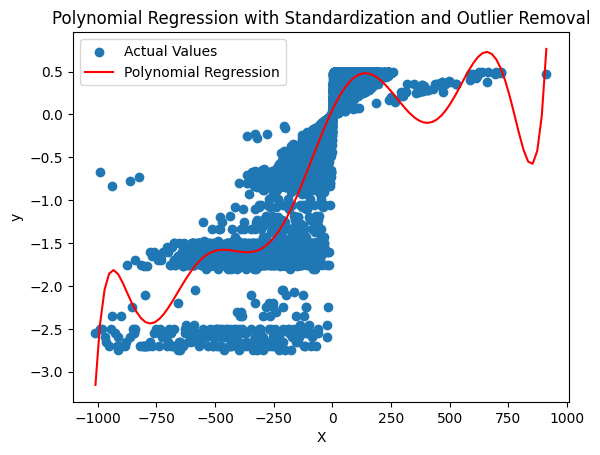

In [43]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy import stats

# Assuming your dataset has features and a target column
X1 = new_data[['Benefit per order']]
y1 = new_data['Order Item Profit Ratio']  # Replace 'target_column' with the name of your target column

# Calculate the Z-scores
z_scores = np.abs(stats.zscore(X1))

# Set a threshold for the Z-scores to identify outliers
threshold = 10
outliers_mask = (z_scores < threshold).all(axis=1)

# Filter out outliers
X1_no_outliers = X1[outliers_mask]
y1_no_outliers = y1[outliers_mask]

# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_no_outliers, y1_no_outliers, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Apply Polynomial Regression
degree = 9  # You can adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_train_poly1 = poly_features.fit_transform(X_train_scaled1)
X_test_poly1 = poly_features.transform(X_test_scaled1)

# Train a linear regression model on the polynomial features
model1 = LinearRegression()
model1.fit(X_train_poly1, y_train1)

# Make predictions on the test set
y_pred1 = model1.predict(X_test_poly1)

# Evaluate the model
mse1 = mean_squared_error(y_test1, y_pred1)
r21 = r2_score(y_test1, y_pred1)

print(f'Mean Squared Error on Test Set: {mse1}')
print(f'R-squared on Test Set: {r21}')

# Visualize the results
X_range = np.linspace(X_test1.min(), X_test1.max(), 100).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)
X_range_poly = poly_features.transform(X_range_scaled)
y_range_pred = model1.predict(X_range_poly)

plt.scatter(X_test1, y_test1, label='Actual Values')
plt.plot(X_range, y_range_pred, label='Polynomial Regression', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression with Standardization and Outlier Removal')
plt.legend()
plt.show()


**3.random forest reg:**

Mean Squared Error on Test Set: 5.6589599489578865e-05
R-squared on Test Set: 0.9997427784185429


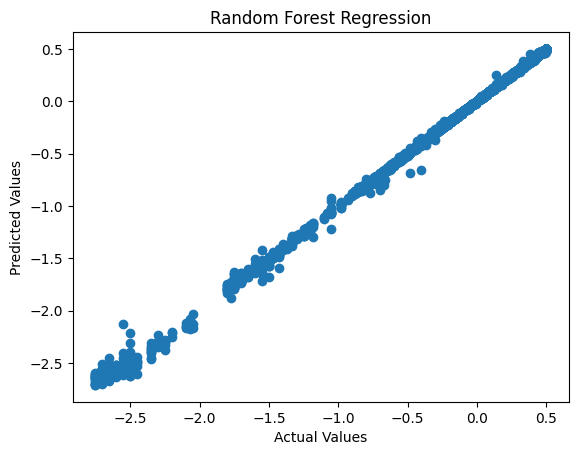

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Assuming your dataset has features and a target column
X2 = new_data.drop('Order Item Profit Ratio', axis=1)  # Exclude the target column from features
y2 = new_data['Order Item Profit Ratio']

# Split the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model2.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred2 = rf_model2.predict(X_test2)

# Evaluate the model
mse2 = mean_squared_error(y_test2, y_pred2)
r22 = r2_score(y_test2, y_pred2)

print(f'Mean Squared Error on Test Set: {mse2}')
print(f'R-squared on Test Set: {r22}')

# Visualize the results
plt.scatter(y_test2, y_pred2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression')
plt.show()

suitable for bi.

**4.Gradiant boost trees**

Mean Squared Error on Test Set: 0.002675980485225314
R-squared on Test Set: 0.9878366353788258


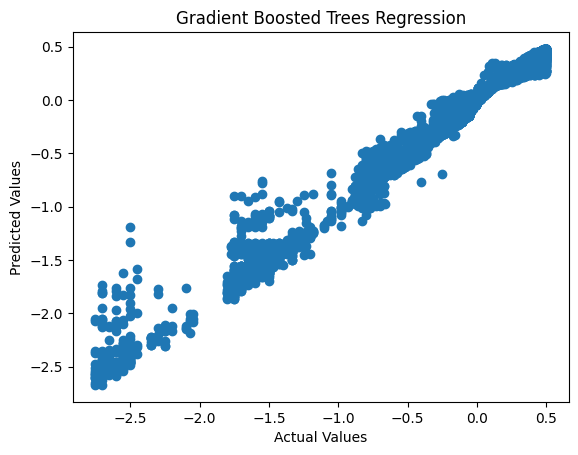

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming your dataset has features and a target column
X3 = new_data.drop('Order Item Profit Ratio', axis=1) # Exclude the target column from features
y3 = new_data['Order Item Profit Ratio']

# Split the data into training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
gb_model3 = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model3.fit(X_train3, y_train3)

# Make predictions on the test set
y_pred3 = gb_model3.predict(X_test3)

# Evaluate the model
mse3 = mean_squared_error(y_test3, y_pred3)
r23 = r2_score(y_test3, y_pred3)

print(f'Mean Squared Error on Test Set: {mse3}')
print(f'R-squared on Test Set: {r23}')

# Visualize the results
plt.scatter(y_test3, y_pred3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosted Trees Regression')
plt.show()